# Sklearn

## Bike Sharing Demand
Задача на kaggle: https://www.kaggle.com/c/bike-sharing-demand

По историческим данным о прокате велосипедов и погодным условиям необходимо оценить спрос на прокат велосипедов.

В исходной постановке задачи доступно 11 признаков: https://www.kaggle.com/c/prudential-life-insurance-assessment/data

В наборе признаков присутсвуют вещественные, категориальные, и бинарные данные. 

Для демонстрации используется обучающая выборка из исходных данных train.csv, файлы для работы прилагаются.

### Библиотеки

In [1]:
from sklearn import model_selection, linear_model, metrics

import numpy as np
import pandas as pd

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Загрузка данных

In [3]:
raw_data = pd.read_csv('bike_sharing_demand.csv')

In [4]:
raw_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


***datetime*** - hourly date + timestamp  

***season*** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

***holiday*** - whether the day is considered a holiday

***workingday*** - whether the day is neither a weekend nor holiday

***weather*** - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
    
***temp*** - temperature in Celsius

***atemp*** - "feels like" temperature in Celsius

***humidity*** - relative humidity

***windspeed*** - wind speed

***casual*** - number of non-registered user rentals initiated

***registered*** - number of registered user rentals initiated

***count*** - number of total rentals

In [5]:
print(raw_data.shape)

(10886, 12)


In [6]:
raw_data.isnull().values.any()

False

### Предобработка данных

#### Типы признаков

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [8]:
raw_data.datetime = raw_data.datetime.apply(pd.to_datetime)

In [9]:
raw_data['month'] = raw_data.datetime.apply(lambda x : x.month)
raw_data['hour'] = raw_data.datetime.apply(lambda x : x.hour)

In [10]:
raw_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4


#### Обучение и отложенный тест

In [15]:
train_X = raw_data.iloc[:-1000, :]
hold_out_test_data = raw_data.iloc[-1000:, :]

In [12]:
print(raw_data.shape, train_data.shape, hold_out_test_data.shape)

(10886, 14) (9886, 14) (1000, 14)


In [13]:
print('train period from {} to {}'.format(train_data.datetime.min(), train_data.datetime.max()))
print('evaluation period from {} to {}'.format(hold_out_test_data.datetime.min(), hold_out_test_data.datetime.max()))

train period from 2011-01-01 00:00:00 to 2012-10-16 06:00:00
evaluation period from 2012-10-16 07:00:00 to 2012-12-19 23:00:00


#### Данные и целевая функция

In [16]:
#обучение
train_y = train_X['count'].values
train_X = train_X.drop(['datetime', 'count'], axis=1)

In [18]:
#тест
test_y = hold_out_test_data['count'].values
test_X = hold_out_test_data.drop(['datetime', 'count'], axis=1)

#### Целевая функция на обучающей выборке и на отложенном тесте

Text(0.5, 1.0, 'test data')

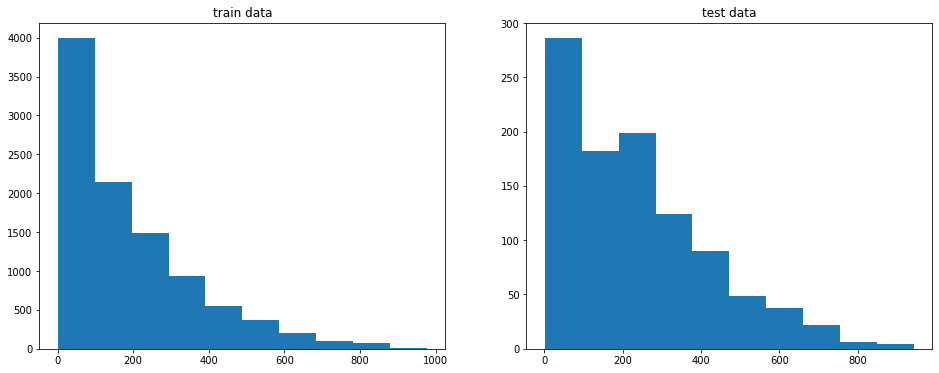

In [19]:
pylab.figure(figsize = (16, 6))

pylab.subplot(1,2,1)
pylab.hist(train_y)
pylab.title('train data')

pylab.subplot(1,2,2)
pylab.hist(test_y)
pylab.title('test data')

#### Числовые признаки

In [20]:
numeric_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'month', 'hour']

In [21]:
train_X = train_X[numeric_columns]
test_X = test_X[numeric_columns]

In [22]:
train_X.head()

,temp,atemp,humidity,windspeed,casual,registered,month,hour
0,9.84,14.395,81,0.0,3,13,1,0
1,9.02,13.635,80,0.0,8,32,1,1
2,9.02,13.635,80,0.0,5,27,1,2
3,9.84,14.395,75,0.0,3,10,1,3
4,9.84,14.395,75,0.0,0,1,1,4


In [23]:
test_X.head()

,temp,atemp,humidity,windspeed,casual,registered,month,hour
9886,17.22,21.210,67,6.0032,20,505,10,7
9887,18.04,21.970,62,0.0000,35,800,10,8
9888,19.68,23.485,55,16.9979,32,323,10,9
9889,20.50,24.240,48,19.0012,65,157,10,10
9890,20.50,24.240,45,27.9993,56,172,10,11


### Модель

In [24]:
regressor = linear_model.SGDRegressor(random_state=0)

In [25]:
regressor.fit(train_X, train_y)
metrics.mean_absolute_error(test_y, regressor.predict(test_X))

32678333066101.656

In [26]:
print(test_y[:10])

[525 835 355 222 228 325 328 308 346 446]


In [27]:
print(regressor.predict(test_X)[:10])

[-8.15217468e+13 -1.27940348e+14 -5.15430820e+13 -2.29149119e+13
 -2.58255957e+13 -3.85635403e+13 -3.92648763e+13 -3.03104198e+13
 -4.03846575e+13 -5.57515848e+13]


In [28]:
regressor.coef_

array([-2.30285477e+10, -5.87204402e+08, -1.27291755e+10, -1.27359409e+09,
        5.83730183e+10, -1.60478942e+11, -3.67459548e+10, -4.87006373e+09])

### Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
#создаем стандартный scaler
scaler = StandardScaler()
scaler.fit(train_X, train_y)
scaled_train_X = scaler.transform(train_X)
scaled_test_X = scaler.transform(test_X)

In [31]:
regressor.fit(scaled_train_X, train_y)
metrics.mean_absolute_error(test_y, regressor.predict(scaled_test_X))

0.042930483012408885

In [33]:
print(test_y[:10])

[525 835 355 222 228 325 328 308 346 446]


In [34]:
print(regressor.predict(scaled_test_X)[:10])

[524.90958201 834.88816062 354.94091402 221.96933203 227.95283001
 324.96044934 327.966113   307.98463956 345.96942383 445.96231877]


### Подозрительно хорошо?

In [36]:
print(regressor.coef_)

[ 4.58902678e-01 -4.51836158e-01  6.62608792e-04 -1.40703258e-02
  5.08590377e+01  1.48008168e+02 -1.32281341e-03  7.59230341e-03]


In [37]:
print(*map(lambda x : round(x, 2), regressor.coef_))

0.46 -0.45 0.0 -0.01 50.86 148.01 -0.0 0.01


In [38]:
train_X.head()

,temp,atemp,humidity,windspeed,casual,registered,month,hour
0,9.84,14.395,81,0.0,3,13,1,0
1,9.02,13.635,80,0.0,8,32,1,1
2,9.02,13.635,80,0.0,5,27,1,2
3,9.84,14.395,75,0.0,3,10,1,3
4,9.84,14.395,75,0.0,0,1,1,4


In [39]:
train_y[:10]

array([16, 40, 32, 13,  1,  1,  2,  3,  8, 14], dtype=int64)

In [40]:
np.all(train_X.registered + train_X.casual == train_y)

True

In [41]:
train_X.drop(['casual', 'registered'], axis=1, inplace=True)
test_X.drop(['casual', 'registered'], axis=1, inplace=True)

In [42]:
scaler.fit(train_X, train_y)
scaled_train_X = scaler.transform(train_X)
scaled_test_X = scaler.transform(test_X)

In [43]:
regressor.fit(scaled_train_X, train_y)
metrics.mean_absolute_error(test_y, regressor.predict(scaled_test_X))

121.8835371361759

In [44]:
print(*map(lambda x : round(x, 2), regressor.coef_))

30.01 32.15 -42.28 3.78 12.71 50.06


### Pipeline

In [45]:
from sklearn.pipeline import Pipeline

In [46]:
#создаем pipeline из двух шагов: scaling и классификация
pipeline = Pipeline(steps = [('scaling', scaler), ('regression', regressor)])

In [47]:
pipeline.fit(train_X, train_y)
metrics.mean_absolute_error(test_y, pipeline.predict(test_X))

121.8835371361759

### Подбор параметров

In [48]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaling', 'regression', 'scaling__copy', 'scaling__with_mean', 'scaling__with_std', 'regression__alpha', 'regression__average', 'regression__early_stopping', 'regression__epsilon', 'regression__eta0', 'regression__fit_intercept', 'regression__l1_ratio', 'regression__learning_rate', 'regression__loss', 'regression__max_iter', 'regression__n_iter_no_change', 'regression__penalty', 'regression__power_t', 'regression__random_state', 'regression__shuffle', 'regression__tol', 'regression__validation_fraction', 'regression__verbose', 'regression__warm_start'])

In [49]:
parameters_grid = {
    'regression__loss' : ['huber', 'epsilon_insensitive', 'squared_loss', ],
#     'regression__n_iter' : [3, 5, 10, 50], 
    'regression__penalty' : ['l1', 'l2', 'none'],
    'regression__alpha' : [0.0001, 0.01],
    'scaling__with_mean' : [0., 0.5],
}

In [54]:
grid_cv = model_selection.GridSearchCV(pipeline, parameters_grid, scoring = 'neg_mean_absolute_error', cv = 4)

In [55]:
%%time
grid_cv.fit(train_X, train_y)

d:\.venvs\ml-ojqruqj1\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
d:\.venvs\ml-ojqruqj1\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
d:\.venvs\ml-ojqruqj1\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
d:\.venvs\ml-ojqruqj1\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
d:\.venvs\ml-ojqruqj1\lib\site-packages\sklearn\line

Wall time: 38.4 s


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaling',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('regression',
                                        SGDRegressor(alpha=0.0001,
                                                     average=False,
                                                     early_stopping=False,
                                                     epsilon=0.1, eta0=0.01,
                                                     fit_intercept=True,
                                                     l1_ratio=0.15,
                                                     learning_rate='invscaling',
                                                     loss='squared_loss',
      

In [56]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-109.56352072364828
{'regression__alpha': 0.01, 'regression__loss': 'epsilon_insensitive', 'regression__penalty': 'l1', 'scaling__with_mean': 0.0}


### Оценка по отложенному тесту

In [57]:
metrics.mean_absolute_error(test_y, grid_cv.best_estimator_.predict(test_X))

134.79035110921586

In [58]:
np.mean(test_y)

232.159

In [59]:
test_predictions = grid_cv.best_estimator_.predict(test_X)

In [60]:
print(test_y[:10])

[525 835 355 222 228 325 328 308 346 446]


In [61]:
print(test_predictions[:10])

[ 93.9256531  111.68774463 148.29424291 172.99576742 189.44675926
 199.0675237  205.09058712 226.32865479 232.79122761 242.07205945]


(-100, 1100)

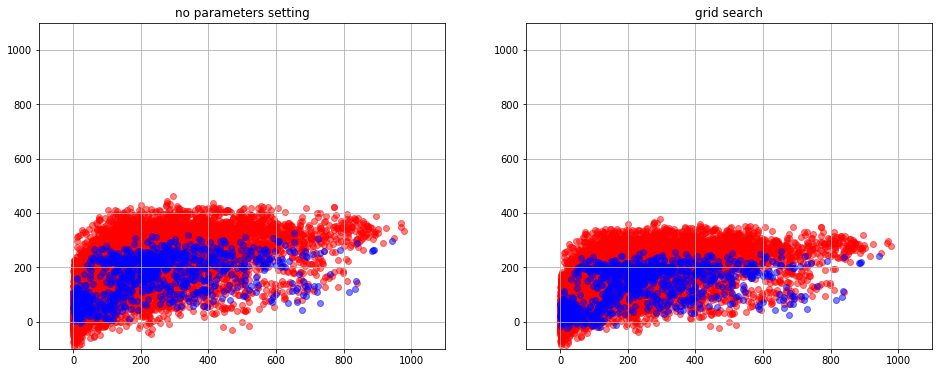

In [62]:
pylab.figure(figsize=(16, 6))

pylab.subplot(1,2,1)
pylab.grid(True)
pylab.scatter(train_y, pipeline.predict(train_X), alpha=0.5, color = 'red')
pylab.scatter(test_y, pipeline.predict(test_X), alpha=0.5, color = 'blue')
pylab.title('no parameters setting')
pylab.xlim(-100,1100)
pylab.ylim(-100,1100)

pylab.subplot(1,2,2)
pylab.grid(True)
pylab.scatter(train_y, grid_cv.best_estimator_.predict(train_X), alpha=0.5, color = 'red')
pylab.scatter(test_y, grid_cv.best_estimator_.predict(test_X), alpha=0.5, color = 'blue')
pylab.title('grid search')
pylab.xlim(-100,1100)
pylab.ylim(-100,1100)